In [98]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [41]:
train_tokens = pd.read_csv('../data/train_x.csv')
train_tags = pd.read_csv('../data/train_y.csv')

In [42]:
train_data = train_tokens.join(train_tags, on="id", how = "inner", rsuffix = "_tag").drop("id_tag",axis=1)

In [88]:
sentences = []
tags = []
temp_tokens = []
temp_tags = []
for row in train_data.iterrows():
    word = row[1]['word']
    tag = row[1]['tag']
    if word!='-DOCSTART-' and word!='.':
        temp_tokens.append(word)
        temp_tags.append(tag)
    if word=='.':
        sentences.append(' '.join(temp_tokens) + ' .')
        tags.append(' '.join(temp_tags) + ' .')
        temp_tokens = []
        temp_tags = []
    

In [137]:
def nGramTagger(n):
    dic = {}
    for line in tags:
        line = line.split(' ')
        line = ['*']*n + line
        for i in range(n,len(line)):
            item = tuple(line[i-n:i])
            if item in dic:
                dic[item]+=1
            else:
                dic[item]=1
    return dic

def wordTagger():
    dic = defaultdict(int) 
    for line1,line2 in zip(sentences,tags):
        for word,tag in zip(line1.split(' '),line2.split(' ')):
            dic[(word,tag)]+=1
    return dic

unigram = nGramTagger(1)
bigram = nGramTagger(2)
trigram = nGramTagger(3)

wordtag = wordTagger()

In [140]:
def get_q(tag_penult,tag_last,tag_current):
    return float(trigram[(tag_penult, tag_last, tag_current)])/float(bigram[(tag_penult, tag_last)])

def get_e(word,tag):
    return float(wordtag[(word,tag)])/float(unigram[tuple([tag])])

In [143]:
def prob_distibution(dic1,dic2,k):
    prob = []
    for key in dic1.keys():
        num = dic1[key] + k
        den = dic2[tuple(key[:-1])] + (k*len(dic2))
        prob.append(float(num)/den)
    plt.plot(sorted(prob,reverse=True))
    plt.show()

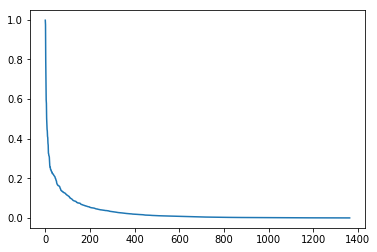

In [149]:
prob_distibution(bigram,unigram,2)

In [138]:
len(bigram)

1364